In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
print("imported!")

imported!


In [6]:
file = pd.read_csv("../datasets/Car_sales_missing.csv")
file.isna().sum()

Manufacturer            0
Sales_in_thousands      2
__year_resale_value    40
Vehicle_type            1
Price_in_thousands      7
Engine_size             4
Horsepower              4
Wheelbase               4
Width                   3
Length                  3
Curb_weight             5
Fuel_capacity           2
Fuel_efficiency         3
Latest_Launch           5
Power_perf_factor      13
dtype: int64

## Earlier Method

file = pd.read_csv("../datasets/Car_sales.csv")
file.drop("Latest_Launch",axis=1,inplace=True)
file["Manufacturer"].fillna("missing",inplace=True)
file["Vehicle_type"].fillna("missing",inplace=True)
file["Model"].fillna("missing",inplace=True)
file["Sales_in_thousands"].fillna(file["Sales_in_thousands"].mean(),inplace=True)
file["Price_in_thousands"].fillna(file["Price_in_thousands"].mean(),inplace=True)
file["Engine_size"].fillna(file["Engine_size"].mean(),inplace=True)
file["__year_resale_value"].fillna(file["__year_resale_value"].mean(),inplace=True)
file["Horsepower"].fillna(file["Horsepower"].mean(),inplace=True)
file["Wheelbase"].fillna(file["Wheelbase"].mean(),inplace=True)
file["Width"].fillna(file["Width"].mean(),inplace=True)
file["Length"].fillna(file["Length"].mean(),inplace=True)
file["Curb_weight"].fillna(file["Curb_weight"].mean(),inplace=True)
file["Fuel_capacity"].fillna(file["Fuel_capacity"].mean(),inplace=True)
file["Fuel_efficiency"].fillna(file["Fuel_efficiency"].mean(),inplace=True)
file["Power_perf_factor"].fillna(file["Power_perf_factor"].mean(),inplace=True)


# split it now
file.drop("Model",axis=1,inplace =True)
x = file.drop("Price_in_thousands",axis=1)
y = file["Price_in_thousands"]
print(x.info())

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features = ["Manufacturer", "Vehicle_type"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",one_hot,features)],remainder="passthrough")

f = pd.DataFrame(x)

transformed_x = transformer.fit_transform(f)

x = pd.DataFrame(transformed_x)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200,max_depth=5)

model.fit(x_train,y_train)

model.score(x_test,y_test)


Model evalutaion

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_preds = model.predict(x_test)
cv=cross_val_score(model,x,y,cv=5)

cv.mean()


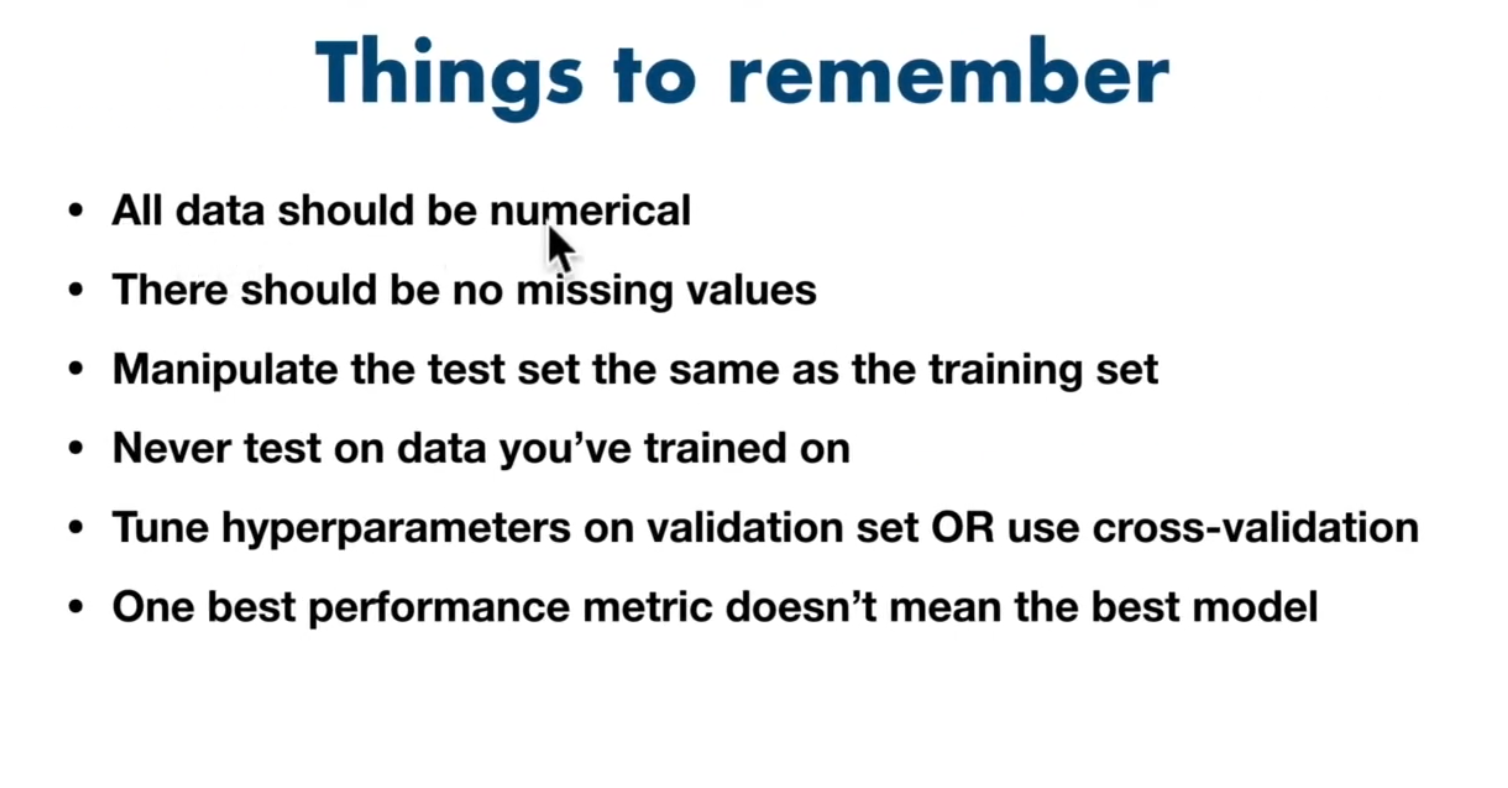

## NOW using PIPELINE




In [7]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# settup
np.random.seed(42)

file

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,NaN,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,15.245,NaN,Passenger,27.50,NaN,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,NaN


In [15]:
'''
our target column is going to be priced in thousands.
so let's make it separate.
'''
x = file.drop("Price_in_thousands",axis=1)
y = file["Price_in_thousands"]

'''
fill missing values of y with mean.
'''
y.fillna(y.mean(),inplace=True)
y.isna().sum()

0

In [16]:
x.isna().sum()

Manufacturer            0
Sales_in_thousands      2
__year_resale_value    40
Vehicle_type            1
Engine_size             4
Horsepower              4
Wheelbase               4
Width                   3
Length                  3
Curb_weight             5
Fuel_capacity           2
Fuel_efficiency         3
Latest_Launch           5
Power_perf_factor      13
dtype: int64

In [22]:
# '''
# importing pipeline and creating function.
# the numeric 
# '''
# categorical_features = ["Manufacturer","Vehicle_type","Latest_Launch"]
# categorical_transformer = Pipeline(steps = [
#     ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
#     ("one_hot",OneHotEncoder(handle_unknown="ignore"))])

# numeric_features=["Sales_in_thousands","__year_resale_value","Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight","Fuel_capacity","Fuel_efficiency","Power_perf_factor"]
# numeric_transformer = Pipeline(steps = [
#     ("imputer",SimpleImputer(strategy="mean"))])


In [23]:
# processor = ColumnTransformer(
#     transformers=[
#         ("cat",features,categorical_transformer),
#         ("num",numeric_features,numeric_transformer)
#     ]
# )

In [24]:
# create a pipeline

# model = Pipeline(steps=[("processor",processor),
#                        ("model",RandomForestRegressor())])

In [25]:
# x_train,x_test,y_train,x_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
# model.fit(x_train,y_train)

In [28]:
 from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'x' and 'y' are your features and target variable

# Categorical features
categorical_features = ["Manufacturer", "Vehicle_type", "Latest_Launch"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])

# Numeric features
numeric_features = [
    "Sales_in_thousands", "__year_resale_value", "Engine_size", "Horsepower",
    "Wheelbase", "Width", "Length", "Curb_weight", "Fuel_capacity",
    "Fuel_efficiency", "Power_perf_factor"
]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numeric_transformer, numeric_features)
    ]
)

# Create a pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Assuming you have 'x' and 'y' as your features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Manufacturer',
                                                   'Vehicle_type',
                                                   'Latest_Launch']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Sales_in_thousands',
                                                   '__year_resale_value',
                                                   'Engine_size', 'Horsepower',
                                                   'Wheelbase', 'Width',
                                                   'Length', 'Curb_weight',
                                                   'Fuel_capacity',
                                                   'Fuel_efficiency',
                                                   'Power_perf_factor'])])),
                ('model', RandomForestRegressor())])

In [29]:
model.score(x_test,y_test)

0.8368970833896987